In [ ]:
!pip install mne

In [ ]:
!pip install eeg_positions

# **Importing Libraries and reading the Preprocessed data**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import nltk
import re
import time
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
import string
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
import plotly.figure_factory as ff
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
import scipy.io
from sklearn.feature_selection import mutual_info_regression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_curve
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import mne
from eeg_positions import get_elec_coords

In [ ]:
df=pd.read_csv(r'/content/Df_preprocessed (1).csv')

In [ ]:
df

,Unnamed: 0,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,label
0,0,0.335038,0.350803,0.386383,0.382694,0.388903,0.384259,0.324582,0.371772,0.178842,0.235855,0.287295,0.297958,0.312892,0.258505,0.310902,0.313029,0.306131,0.313667,0.310917,0
1,1,0.387232,0.274562,0.494701,0.290063,0.506105,0.245683,0.474407,0.287532,0.462121,0.228246,0.428885,0.250042,0.417819,0.243313,0.394529,0.211636,0.484410,0.253041,0.430822,0
2,2,0.213529,0.226200,0.233447,0.239186,0.206145,0.269256,0.207142,0.280646,0.200542,0.270002,0.184769,0.167180,0.183914,0.194079,0.160464,0.183387,0.229746,0.257888,0.227645,0
3,3,0.292671,0.241536,0.493374,0.502810,0.516281,0.521020,0.417825,0.456831,0.282943,0.267064,0.245093,0.258088,0.337609,0.403353,0.297118,0.377677,0.437617,0.342920,0.378390,0
4,4,0.346029,0.354078,0.360827,0.449844,0.383315,0.354668,0.371950,0.437448,0.215580,0.384313,0.329467,0.401644,0.274604,0.388668,0.307233,0.399812,0.309470,0.376372,0.309475,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,116,0.309895,0.312626,0.230568,0.349177,0.328292,0.318996,0.358948,0.341061,0.288601,0.306197,0.287438,0.318433,0.249575,0.299025,0.247730,0.228662,0.281399,0.241214,0.252185,1
117,117,0.318146,0.284052,0.255549,0.289795,0.207993,0.242576,0.213281,0.226987,0.175099,0.215026,0.283096,0.203045,0.249787,0.182652,0.159298,0.144923,0.278210,0.248315,0.199927,1
118,118,0.301197,0.270250,0.310468,0.298029,0.292355,0.261588,0.261356,0.251037,0.188390,0.209553,0.248784,0.162316,0.250101,0.221374,0.189878,0.209652,0.288664,0.244984,0.210675,1
119,119,0.413807,0.306365,0.372274,0.266940,0.384445,0.296911,0.406224,0.248007,0.261596,0.226670,0.382783,0.227374,0.411393,0.270862,0.400743,0.261594,0.388536,0.271187,0.364075,1


In [ ]:
X = df.iloc[:,1:20].values
y = df.iloc[:, 20].values

# **Defining accuracy measure functions**

In [ ]:
def confusion(Y,Y_hat):
    p_index = np.where(Y==1)
    n_index = np.where(Y==0)
    tp = np.count_nonzero(Y[p_index]==Y_hat[p_index])
    fp = np.count_nonzero(Y[n_index]!=Y_hat[n_index])
    fn = np.count_nonzero(Y[p_index]!=Y_hat[p_index])
    tn = np.count_nonzero(Y[n_index]==Y_hat[n_index])
    return {'tp':tp,'fp':fp,'fn':fn,'tn':tn}

def confusion_matrix(Y,Y_hat):
    conf = confusion(Y,Y_hat)
    return np.array([[conf['tn'],conf['fp']],[conf['fn'],conf['tp']]])


def accuracy_score(y_true, y_pred):
    tptn = 0
    for i in range(len(y_true)):
        if y_true[i] == y_pred[i]:
          tptn += 1
    return tptn/len(y_true)

def precision_score(y_true,y_pred):
  tp = 0
  tpfp = 0
  for i in range(len(y_true)):
    if y_pred[i] == 1:
        tpfp += 1
        if y_true[i] == 1:
            tp +=1
  return tp / tpfp

def recall_score(y_true,y_pred):
  tp = 0
  tpfn = 0
  for i in range(len(y_true)):
    if y_true[i] == 1:
        tpfn += 1
        if y_pred[i] == 1:
            tp += 1
  return tp / tpfn

def f1_score(y_true,y_pred):
  p = precision_score(y_true,y_pred)
  r = recall_score(y_true,y_pred)
  return ((2 * p * r) / (p + r))

# **PCA**

In [ ]:
principal=PCA(n_components=2)
principal.fit(X)
X_pca=principal.transform(X)

Text(0, 0.5, 'pc2')

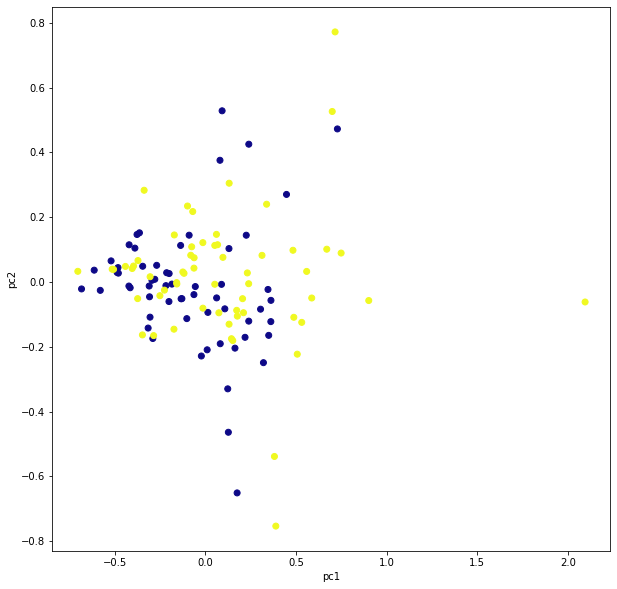

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(X_pca[:,0],X_pca[:,1],c=y,cmap='plasma')
plt.xlabel('pc1')
plt.ylabel('pc2')

We can see that the data points are not linearly seperable

Text(0, 0.5, 'cumulative explained variance')

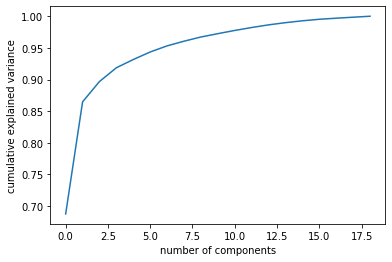

In [ ]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

# **PCA followed by logistic regression**

In [ ]:
# define the pipeline
steps = [('pca', PCA(n_components=17)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.661 (0.165)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)
y_pred=logisticRegr.predict(x_test)

***Accuracy Measures***

In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_pred,y_test))

Confusion Matrix:
[[14  6]
 [ 2  9]]


In [ ]:
print("Accuracy =",accuracy_score(y_test,y_pred))
print("Precision=",precision_score(y_test,y_pred))
print("f1_score=",f1_score(y_test,y_pred))

Accuracy = 0.7419354838709677
Precision= 0.8181818181818182
f1_score= 0.6923076923076923


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.



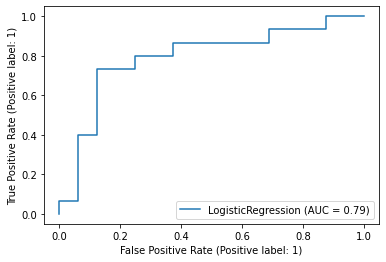

In [ ]:
metrics.plot_roc_curve(logisticRegr, x_test, y_test) 

Since it's not linearly seperable the accuracy is low so, logistic regression is not suitable

# **PCA followed by SVM for classification**

In [ ]:
principal=PCA(n_components=17)
principal.fit(X)
X_pca=principal.transform(X)

In [ ]:
svc = SVC()
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
C = np.logspace(0,5,20)
print(C)
hyperparameters = dict(C=C, kernel=kernel)
clf = GridSearchCV(svc,hyperparameters,cv=5)

[1.00000000e+00 1.83298071e+00 3.35981829e+00 6.15848211e+00
 1.12883789e+01 2.06913808e+01 3.79269019e+01 6.95192796e+01
 1.27427499e+02 2.33572147e+02 4.28133240e+02 7.84759970e+02
 1.43844989e+03 2.63665090e+03 4.83293024e+03 8.85866790e+03
 1.62377674e+04 2.97635144e+04 5.45559478e+04 1.00000000e+05]


In [ ]:
best_model= clf.fit(X_pca,y)

In [ ]:
best_c = best_model.best_estimator_.get_params()['C']
best_kernel = best_model.best_estimator_.get_params()['kernel']
print('Best C', best_c)
print('Best Kernel', best_kernel)

Best C 37.926901907322495
Best Kernel rbf


In [ ]:
from sklearn.model_selection import KFold,cross_val_score

In [ ]:
kfold = KFold(n_splits=5)
model = SVC(C=best_c,kernel=best_kernel)
results = cross_val_score(model,X_pca,y,cv=kfold)
print("Accuracy",results.mean())

Accuracy 0.5966666666666667


In [ ]:
svclassifier = SVC(kernel=best_kernel)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,shuffle=True)
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)

***Accuracy Measures***

In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_pred,y_test))

Confusion Matrix:
[[12  8]
 [ 2  9]]


In [ ]:
print("Accuracy=",accuracy_score(y_test,y_pred))
print("Precision=",precision_score(y_test,y_pred))
print("f1_score=",f1_score(y_test,y_pred))

Accuracy= 0.6774193548387096
Precision= 0.8181818181818182
f1_score= 0.6428571428571428


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.



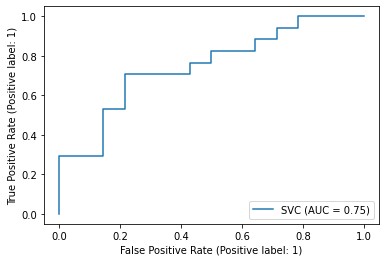

In [ ]:
metrics.plot_roc_curve(svclassifier, X_test, y_test) 

No much difference in the accuracy when compared to logistic regression

# **PCA followed by Decision Tree**

In [ ]:
dtc = DecisionTreeClassifier(criterion='entropy')

In [ ]:
X_train_dt,X_test_dt,y_train_dt,y_test_dt = train_test_split(X_pca,y,shuffle=True)
dtc.fit(X_train_dt,y_train_dt)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
y_pred_dt = dtc.predict(X_test_dt)

***Accuracy Measures***

In [ ]:
y_pred_dt = np.array(y_pred_dt)
y_test_dt = np.array(y_test_dt)
confusion_matrix(y_pred_dt,y_test_dt)

array([[10,  1],
       [ 8, 12]])

In [ ]:
print("Accuracy =",accuracy_score(y_test_dt,y_pred_dt))
print("Precision=",precision_score(y_test_dt,y_pred_dt))
print("f1_score=",f1_score(y_test_dt,y_pred_dt))

Accuracy = 0.7096774193548387
Precision= 0.6
f1_score= 0.7272727272727274


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.



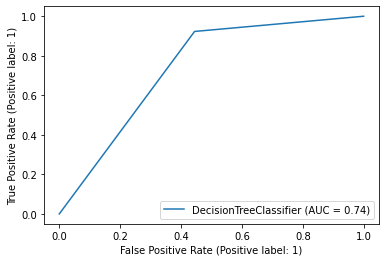

In [ ]:
metrics.plot_roc_curve(dtc, X_test_dt, y_test_dt) 

# **PCA followed by KNN**

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
model.fit(xtrain,ytrain)

#Predict Output
y_pred= model.predict(xtest) # 0:Overcast, 2:Mild

***Accuracy Measures***

In [ ]:
print("Accuracy =",accuracy_score(ytest,y_pred))
print("Precision=",precision_score(ytest,y_pred))
print("f1_score=",f1_score(ytest,y_pred))

Accuracy = 0.6
Precision= 0.5
f1_score= 0.4444444444444445


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.



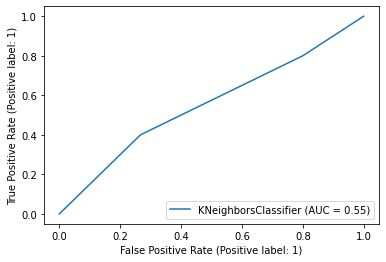

In [ ]:
metrics.plot_roc_curve(model, xtest, ytest) 

# **Topoplot**

In [ ]:
data=pd.read_csv(r'/content/Df_preprocessed 2.txt')

In [ ]:
data = data.drop(["SNO"],axis =1 )
data.head()

,Fz,Cz,Pz,C3,T7,C4,T8,Fp1,Fp2,F3,F4,F7,F8,P3,P4,P7,P8,O1,O2,label
0,0.335038,0.350803,0.386383,0.382694,0.388903,0.384259,0.324582,0.371772,0.178842,0.235855,0.287295,0.297958,0.312892,0.258505,0.310902,0.313029,0.306131,0.313667,0.310917,0
1,0.387232,0.274562,0.494701,0.290063,0.506105,0.245683,0.474407,0.287532,0.462121,0.228246,0.428885,0.250042,0.417819,0.243313,0.394529,0.211636,0.484410,0.253041,0.430822,0
2,0.213529,0.226200,0.233447,0.239186,0.206145,0.269256,0.207142,0.280646,0.200542,0.270002,0.184769,0.167180,0.183914,0.194079,0.160464,0.183387,0.229746,0.257888,0.227645,0
3,0.292671,0.241536,0.493374,0.502810,0.516281,0.521020,0.417825,0.456831,0.282943,0.267064,0.245093,0.258088,0.337609,0.403353,0.297118,0.377677,0.437617,0.342920,0.378390,0
4,0.346029,0.354078,0.360827,0.449844,0.383315,0.354668,0.371950,0.437448,0.215580,0.384313,0.329467,0.401644,0.274604,0.388668,0.307233,0.399812,0.309470,0.376372,0.309475,0


In [ ]:
grouped_data = data.groupby(data.label)

In [ ]:
class_0 = grouped_data.get_group(0)
class_1 = grouped_data.get_group(1)

In [ ]:
info = data.columns.values[:-1]
class_0_min = class_0.min(axis=0)[:-1]
class_1_min = class_1.min(axis=0)[:-1]

In [ ]:
coords = get_elec_coords(system="1020",dim="2d").set_index("label")
coords['xy']=coords.apply(lambda x : (x.x,x.y),axis=1)
coords['xy']

label
C3                       (-0.324930901050304, 0.0)
C4                        (0.324930901050304, 0.0)
Cz                                      (0.0, 0.0)
F3        (-0.2744172145845786, 0.346682606096832)
F4         (0.2744172145845786, 0.346682606096832)
F7      (-0.5878533231474408, 0.42704354469060357)
F8       (0.5878533231474408, 0.42704354469060357)
Fp1      (-0.2245225362872422, 0.6909854851031322)
Fp2       (0.2245225362872422, 0.6909854851031322)
Fpz                       (0.0, 0.726585179526356)
Fz                        (0.0, 0.324930901050304)
LPA                                    (-1.0, 0.0)
NAS                                     (0.0, 1.0)
O1      (-0.2245225362872422, -0.6909854851031322)
O2       (0.2245225362872422, -0.6909854851031322)
Oz                       (0.0, -0.726585179526356)
P3       (-0.2744172145845786, -0.346682606096832)
P4        (0.2744172145845786, -0.346682606096832)
P7     (-0.5878533231474408, -0.42704354469060357)
P8      (0.58785332314744

In [ ]:
pos_arr = [coords['xy'][x] for x in info]
print(len(pos_arr))

19


In [ ]:
pos_array=np.array(pos_arr)

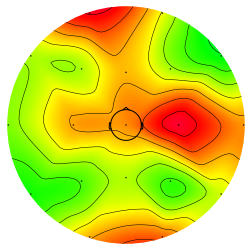

(<matplotlib.image.AxesImage at 0x7f2f0b86b510>,
 <matplotlib.contour.QuadContourSet at 0x7f2f0ba83a90>)

In [ ]:
mne.viz.plot_topomap(data=class_0_min.to_numpy(),pos=pos_array,cmap='gist_rainbow_r')

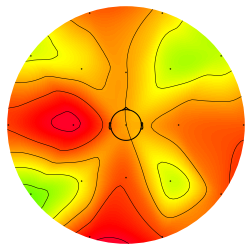

(<matplotlib.image.AxesImage at 0x7f2f0ad44d10>,
 <matplotlib.contour.QuadContourSet at 0x7f2f0ad4f190>)

In [ ]:
mne.viz.plot_topomap(data=class_1_min.to_numpy(),pos=pos_array,cmap='gist_rainbow_r')

# **Conclusion**

1. The data is non-linearly seperable.
2. By using PCA the dimensionality got reduced from 19 to 17(optimal).
3. The highest accuracy that we obtained is 67.74% through SVM by choosing the best kernel i.e; gaussian kernel.